<a href="https://colab.research.google.com/github/MrBCPT/Prediction-of-Product-Sales/blob/main/Project_2_Part_4_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Student: Satish Byrow

#**1. Goal**
- Predict which features would most likely result in a stroke

##Dictionary
1) id: unique identifier<br>
2) gender: "Male", "Female" or "Other"<br>
3) age: age of the patient<br>
4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension<br>
5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease<br>
6) ever_married: "No" or "Yes"<br>
7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"<br>
8) Residence_type: "Rural" or "Urban"<br>
9) avg_glucose_level: average glucose level in blood<br>
10) bmi: body mass index<br>
11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*<br>
12) stroke: 1 if the patient had a stroke or 0 if not<br><br>
*Note: "Unknown" in smoking_status means that the information is unavailable for this patient<br>

#**2. Import and Loading**


## Load Libraries

In [ ]:
#Load Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#import some necessary tools
from sklearn import preprocessing

from sklearn import set_config
set_config(transform_output='pandas')

## Load Data

In [ ]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###Data Source First choice: dataset 1
 - https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

In [ ]:
## Loading data from published google sheet
fpath ="/content/drive/MyDrive/CodingDojo/02-MachineLearning/Week05/Data/healthcare-dataset-stroke-data.csv"
df_main = pd.read_csv(fpath)

In [ ]:
#Make a copy so we dont break the original data set and avoid any manipulations
df = df_main.copy()

#**3. Explore Data Set**

In [ ]:
#Check then data
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


###Brief Description of Data
- The data is a view of patients that have or have not had a stroke based on Gender, Age, BMI, heart disease and if they have smoked<br>


###Target
- The stroke column is the target to identify if a person is at risk of a stroke

###Row Classification
- Each row represents a persons profile details

###Feature Count
- There are 11 valid features. The ID column can be dropped as it does not represent valid data. The target column is stroke.


###Type of Problem
- This data set is identfied as a classification problem as the person can either be at risk of a stroke or not

In [ ]:
#Explore the dataset more
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


###Rows in Dataset
- 5110

In [ ]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

###What, if any, challenges do you foresee in cleaning, exploring, or modeling this dataset
- Cleaning: Null values in BMI field
- Exploring: Different data types(int64. object and float64)
- Modeling: Choosing the correct models like KNN that would work but may process slower

#**4. Clean the data**

###Drop Columns

In [ ]:
#Drop columns not needed
df.drop(columns=["id"], inplace=True)
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

###Duplicates

In [ ]:
#Delete duplicate rows
## Display the number of duplicate rows in the dataset
print(f'There are {df.duplicated().sum()} duplicate rows.')

There are 0 duplicate rows.


###Check for missing values

In [ ]:
# Display the total number of missing values
print(f'There are {df.isna().sum().sum()} missing values.')

There are 201 missing values.


In [ ]:
#Check percentage
df.isna().sum() / len(df) * 100

gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.933464
smoking_status       0.000000
stroke               0.000000
dtype: float64

- Missing Values:
  - There are 3.9% missing values in the `bmi` column.


**Interpretation**
- Use simpleimputer to solve for missing values

In [ ]:
#Check for categorical descrepencies
for col in df.select_dtypes(include='object').columns:
  print(df[col].value_counts())

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64
Yes    3353
No     1757
Name: ever_married, dtype: int64
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64
Urban    2596
Rural    2514
Name: Residence_type, dtype: int64
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64


**Interpretation**
- Drop Other


In [ ]:
#Categorical
#Drop Other
df.drop(df[df['gender'] == 'Other'].index, inplace=True)

# Replace boolean values with 0s and 1s
#df['gender'].replace({'F':1, 'M':0}, inplace=True)
#Replace smoking status with Nominal
#df['smoking_status'].replace({'never smoked':0, 'formerly smoked':1, 'smokes':2, 'Unknown':3}, inplace=True)


In [ ]:
#Check for numerical descrepencies
for col in df.select_dtypes(include='number').columns:
  print(df[col].value_counts())

78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
        ... 
1.40       3
0.48       3
0.16       3
0.40       2
0.08       2
Name: age, Length: 104, dtype: int64
0    4611
1     498
Name: hypertension, dtype: int64
0    4833
1     276
Name: heart_disease, dtype: int64
93.88     6
91.68     5
91.85     5
83.16     5
73.00     5
         ..
94.07     1
111.93    1
94.40     1
95.57     1
85.28     1
Name: avg_glucose_level, Length: 3978, dtype: int64
28.7    41
28.4    38
26.7    37
27.6    37
26.1    37
        ..
48.7     1
49.2     1
51.0     1
49.4     1
14.9     1
Name: bmi, Length: 418, dtype: int64
0    4860
1     249
Name: stroke, dtype: int64


**Interpretation**
- Outliers in Age


In [ ]:
#Check for outliers
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5109.000000,5109.000000,5109.000000,5109.000000,4908.00000,5109.000000
mean,43.229986,0.097475,0.054022,106.140399,28.89456,0.048738
std,22.613575,0.296633,0.226084,45.285004,7.85432,0.215340
min,0.080000,0.000000,0.000000,55.120000,10.30000,0.000000
25%,25.000000,0.000000,0.000000,77.240000,23.50000,0.000000
50%,45.000000,0.000000,0.000000,91.880000,28.10000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.10000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.60000,1.000000


**Interpretation**
- Outliers in Age confirmed

In [ ]:
#Check info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5109 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5109 non-null   object 
 1   age                5109 non-null   float64
 2   hypertension       5109 non-null   int64  
 3   heart_disease      5109 non-null   int64  
 4   ever_married       5109 non-null   object 
 5   work_type          5109 non-null   object 
 6   Residence_type     5109 non-null   object 
 7   avg_glucose_level  5109 non-null   float64
 8   bmi                4908 non-null   float64
 9   smoking_status     5109 non-null   object 
 10  stroke             5109 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 479.0+ KB


**Interpretation**
- Missing values in BMI

###Exploratory Data Analysis(EDA)

####Correlation

<ipython-input-126-9a1ef2c3dd86>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


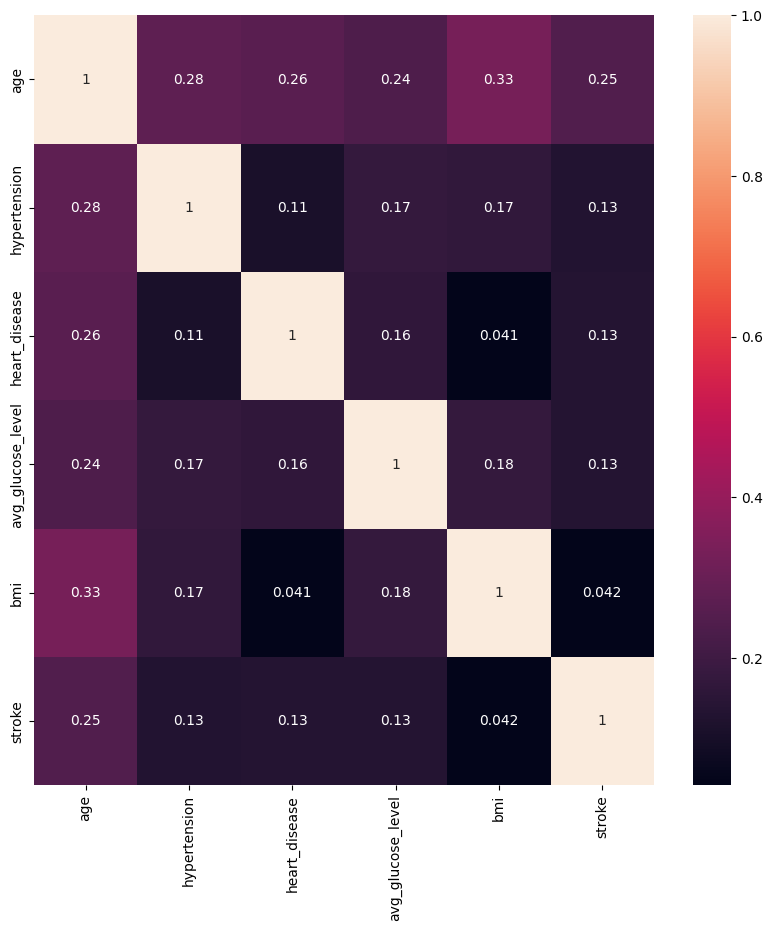

In [ ]:
# Explore the relationships between variables witha correlation heatmap
corr = df.corr()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, annot = True);

**Interpretation**
- There is a strong positive correlation between bmi and age
- There is a weak positive correlation between hypertension and heart disease
- There is a strong positive correlation between hypertension and age


####Selected Visualisations

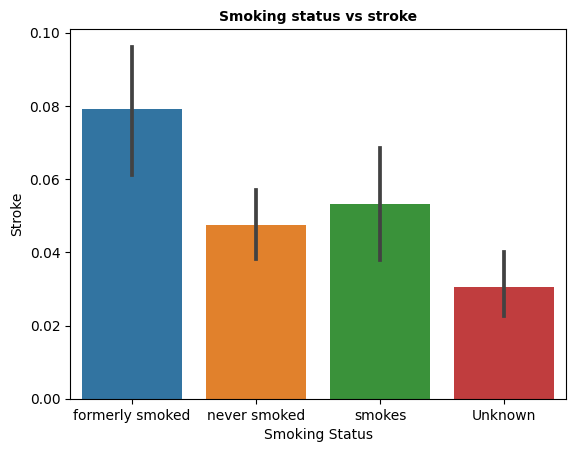

In [ ]:
# Using seaborn to plot the comparison
ax = sns.barplot(data=df, x='smoking_status', y="stroke")
# Add title and labels
ax.set_ylabel('Stroke')
ax.set_xlabel("Smoking Status");
plt.title(f"Smoking status vs stroke", size=10, fontweight="black");

**Interpretation**
- A person that smoked before is more likely to have a stroke
- A person that did not smoke is less likely to have a stroke than a person that smokes

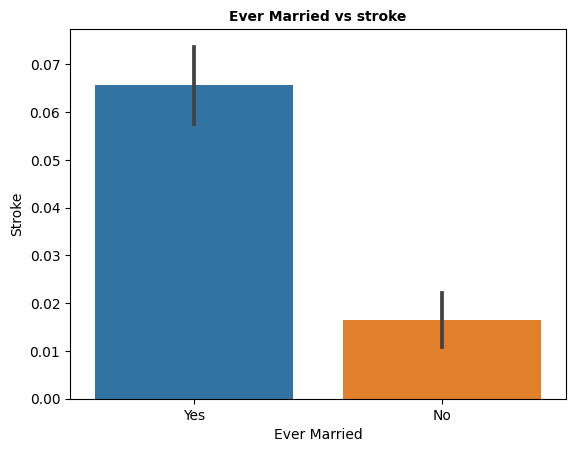

In [ ]:
# Using seaborn to plot the comparison
ax = sns.barplot(data=df, x='ever_married', y="stroke")
# Add title and labels
ax.set_ylabel('Stroke')
ax.set_xlabel("Ever Married");
plt.title(f"Ever Married vs stroke", size=10, fontweight="black");

**Interpretation**
- The married people are more likely to suffer a stroke


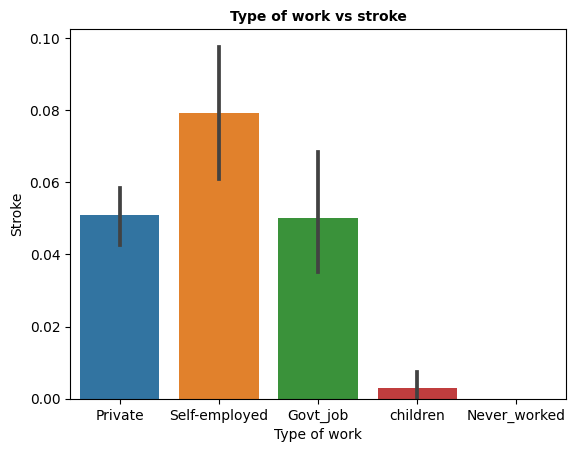

In [ ]:
# Using seaborn to plot the comparison
ax = sns.barplot(data=df, x='work_type', y="stroke")
# Add title and labels
ax.set_ylabel('Stroke')
ax.set_xlabel("Type of work");
plt.title(f"Type of work vs stroke", size=10, fontweight="black");

**Interpretation**
- Self employed people are more likely to suffer a stroke